In [22]:
import json
import pandas as pd
import C2Analyse
import C2Analyse as C2A
import matplotlib.pyplot as plt
import importlib
import re
import missingno as msno
import plotly.express as px
import numpy as np
from datetime import datetime
importlib.reload(C2A)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

pd.options.display.max_columns = None
reload_data = 1

# Import the Data Files
This takes a while for large files.

In [2]:
if reload_data == 1:
    clean = C2A.Clean(verbose = 1)
    clean.load_JSON()

Loading JSON.
Loaded.


In [4]:
if clean.verbose == 1:
    display(clean.df.athletes)
    display(clean.df.extended)
    display(clean.df.workouts)

name availablity age         country        location  \
profile_id                                                                      
1157105        Benjamin Smith   available  32       Australia   Brisbane, QLD   
1120032            Jasper Liu   available  26   United States             NaN   
451524             Chris Gray   available  29   United States     Raleigh, NC   
1301914     Frederick Hancock   available  19  United Kingdom             NaN   
1189208           Itai Almogy   available  19   United States             NaN   
...                       ...         ...  ..             ...             ...   
1250363             John Oney   available  23   United States   Greenwich, OH   
737313            Alan Aikens   available  54   United States  Dorchester, MA   
1210804          George Watts   available  41   United States              UT   
1083487         Amir Mishriky   available  43           Egypt           Cairo   
1039194          HELIN GERARD   available  71          France  LA FERTE ALAIS   

                                     team      height  weight logbook id  \
profile_id                                                                 
1157105                      Fusion Sport   6 ft 0 in  162 lb    1157105   
1120032                               NaN         NaN     NaN    1120032   
451524          Row House Raleigh Midtown   6 ft 4 in  190 lb     451524   
1301914         Forum Flyers (since 2001)   6 ft 2 in  163 lb    1301914   
1189208                               NaN         NaN     NaN    1189208   
...                                   ...         ...     ...        ...   
1250363                               NaN  5 ft 10 in  177 lb    1250363   
737313                Cambridge Boat Club         NaN  238 lb     737313   
1210804                               NaN   5 ft 7 in  178 lb    1210804   
1083487     Fitness Matters Indoor Rowing  5 ft 10 in  185 lb    1083487   
1039194                               NaN   6 ft 2 in  201 lb    1039194   

                  member since            retrieved  \
profile_id                                            
1157105     September 28, 2017  13-03-2021 12:24:37   
1120032      December 30, 2016  13-03-2021 12:24:37   
451524       November 22, 2007  13-03-2021 12:24:38   
1301914      December 04, 2019  13-03-2021 12:24:38   
1189208         March 08, 2018  13-03-2021 12:24:38   
...                        ...                  ...   
1250363      February 08, 2019  14-03-2021 14:03:20   
737313      September 28, 2008  14-03-2021 14:03:20   
1210804        August 18, 2018  14-03-2021 14:03:23   
1083487      February 21, 2016  14-03-2021 14:03:29   
1039194      February 22, 2015  14-03-2021 14:03:38   

                                            affiliation   wingspan  website  \
profile_id                                                                    
1157105                                             NaN        NaN      NaN   
1120032                                             NaN        NaN      NaN   
451524      University of North Carolina at Chapel Hill        NaN      NaN   
1301914                                    Forum Flyers  6 ft 5 in      NaN   
1189208                                             NaN        NaN      NaN   
...                                                 ...        ...      ...   
1250363                                             NaN        NaN      NaN   
737313                              Cambridge Boat Club        NaN      NaN   
1210804                                             NaN        NaN      NaN   
1083487                                 Fitness Matters        NaN      NaN   
1039194                                             NaN  6 ft 4 in      NaN   

            email adaptive rowing category adaptive skiing category  
profile_id                                                           
1157105       NaN                      NaN                      NaN  
1120032       NaN           

age    gender weight class          country verified  \
workout_id                                                          
45106891     18      Male          Lwt     United States      Yes   
51182039     42      Male          Lwt     United States      Yes   
51157298     32      Male          Lwt         Australia      Yes   
50803540     24      Male          Lwt            France      Yes   
49949686     19      Male          Lwt    United Kingdom      Yes   
...          ...       ...          ...              ...      ...   
34619955     55    Female           NaN   United Kingdom       No   
34898628     52    Female           NaN           Norway       No   
35443299     22    Female           NaN    United States       No   
34790536     27    Female           NaN    United States      Yes   
35223315     36    Female           NaN          Belgium       No   

                     type      time distance     pace  \
workout_id                                              
45106891     Indoor Rower   1:00.0      379m   1:19.1   
51182039     Indoor Rower   1:00.0      366m   1:21.9   
51157298     Indoor Rower   1:00.0      397m   1:15.5   
50803540     Indoor Rower   1:00.0      366m   1:21.9   
49949686     Indoor Rower   1:00.0      389m   1:17.1   
...                   ...       ...      ...      ...   
34619955          BikeErg   8:22.0    4,000m   2:05.5   
34898628          BikeErg   8:23.8    4,000m   2:05.9   
35443299          BikeErg   8:24.9    4,000m   2:06.2   
34790536          BikeErg   8:25.6    4,000m   2:06.4   
35223315          BikeErg   8:34.3    4,000m   2:08.5   

                                    date           entered  \
workout_id                                                   
45106891                  June 13, 2020                Web   
51182039      February 02, 2021 18:15:00       ErgData iOS   
51157298      February 02, 2021 20:16:00   ErgData Android   
50803540       January 23, 2021 23:08:00   ErgData Android   
49949686       January 02, 2021 19:28:00       ErgData iOS   
...                                  ...               ...   
34619955     September 07, 2018 18:16:00       ErgData iOS   
34898628             September 30, 2018                Web   
35443299              November 15, 2018                Web   
34790536     September 22, 2018 13:09:00   ErgData Android   
35223315               October 28, 2018                Web   

                      retrieved race adaptive category  
workout_id                                              
45106891    13-03-2021 12:24:37  NaN               NaN  
51182039    13-03-2021 12:24:38  NaN               NaN  
51157298    13-03-2021 12:24:38  NaN               NaN  
50803540    13-03-2021 12:24:39  NaN               NaN  
49949686    13-03-2021 12:24:39  NaN               NaN  
...                         ...  ...               ...  
34619955    14-03-2021 14:03:42  NaN               NaN  
34898628    14-03-2021 14:03:42  NaN               NaN  
35443299    14-03-2021 14:03:42  NaN               NaN  
34790536    14-03-2021 14:03:42  NaN               NaN  
35223315    14-03-2021 14:03:43  NaN               NaN  

[331747 rows x 14 columns]

pos.               name age           location country  \
workout_id                                                          
51157298      1     Benjamin Smith  32      Brisbane, QLD     AUS   
49949686      2  Frederick Hancock  19                NaN     GBR   
48271042      3         Jasper Liu  26                NaN     USA   
45106891      4        Itai Almogy  18                NaN     USA   
48223141      5         Chris Gray  29        Raleigh, NC     USA   
...         ...                ...  ..                ...     ...   
38060086     42      Steven Meador  63     Hershey 🇺🇸, PA     USA   
36865147      1      Kirsten Kline  30        Houston, TX     USA   
34894246      2        Katrin Jüch  42          Pattensen     GER   
33478889      3       Terry Laskey  64    Morrisville, VT     USA   
36343943      4           Fei Yuan  36  Fresh Meadows, NY     USA   

                                       club/affiliation distance verified  \
workout_id                                                                  
51157298                                            NaN      397      Yes   
49949686                                   Forum Flyers      389      Yes   
48271042                                            NaN      386      Yes   
45106891                                            NaN      379      Yes   
48223141    University of North Carolina at Chapel Hill      372      Yes   
...                                                 ...      ...      ...   
38060086             Washington University in St. Louis      NaN      Yes   
36865147                         Engine by Carson (EBC)      NaN      Yes   
34894246                                 Mobility3sixty      NaN      Yes   
33478889                 Concept2, Inc, Morrisville, VT      NaN      Yes   
36343943                              CrossFit Flushing      NaN       No   

            year  machine   event            retrieved profile_id  rower  \
workout_id                                                                 
51157298    2021    rower       1  13-03-2021 12:24:35    1157105  rower   
49949686    2021    rower       1  13-03-2021 12:24:35    1301914  rower   
48271042    2021    rower       1  13-03-2021 12:24:35    1120032  rower   
45106891    2021    rower       1  13-03-2021 12:24:35    1189208  rower   
48223141    2021    rower       1  13-03-2021 12:24:35     451524  rower   
...          ...      ...     ...                  ...        ...    ...   
38060086    2019  bikeerg  100000  14-03-2021 04:06:48    1060250    NaN   
36865147    2019  bikeerg  100000  14-03-2021 04:06:50    1223199    NaN   
34894246    2019  bikeerg  100000  14-03-2021 04:06:50    1189710    NaN   
33478889    2019  bikeerg  100000  14-03-2021 04:06:50       7270    NaN   
36343943    2019  bikeerg  100000  14-03-2021 04:06:50    1214385    NaN   

           weight gender adaptive category       time  
workout_id                                             
51157298        L      M      NaN      NaN        NaN  
49949686        L      M      NaN      NaN        NaN  
48271042        L      M      NaN      NaN        NaN  
45106891        L      M      NaN      NaN        NaN  
48223141        L      M      NaN      NaN        NaN  
...           ...    ...      ...      ...        ...  
38060086      NaN      M      NaN      NaN  4:26:36.6  
36865147      NaN      F      NaN      NaN  3:20:23.4  
34894246      NaN      F      NaN      NaN  4:11:31.8  
33478889      NaN      F      NaN      NaN  4:33:07.0  
36343943      NaN      F      NaN      NaN  4:44:30.4  

[331944 rows x 19 columns]

# Join the Datasets Together

Inner join

In [6]:
clean.df.merge_frames()
if clean.verbose == 1:
    clean.df.merge

pos.          name_x age_x      location_x country_x  \
workout_id                                                        
51157298      1  Benjamin Smith    32   Brisbane, QLD       AUS   
52341234      1  Benjamin Smith    32   Brisbane, QLD       AUS   
52341240      1  Benjamin Smith    32   Brisbane, QLD       AUS   
52341235      1  Benjamin Smith    32   Brisbane, QLD       AUS   
52341315      1  Benjamin Smith    32   Brisbane, QLD       AUS   
...         ...             ...   ...             ...       ...   
36932715     95       John Oney    21   Greenwich, OH       USA   
36678498     96     Alan Aikens    52  Dorchester, MA       USA   
34481670    113    George Watts    38              UT       USA   
33677273    143   Amir Mishriky    41           Cairo       EGY   
35512793    176    HELIN GERARD    69  LA FERTE ALAIS       FRA   

               club/affiliation distance_x verified_x  year  machine  event  \
workout_id                                                                    
51157298                    NaN        397        Yes  2021    rower      1   
52341234                    NaN        394        Yes  2021    rower      1   
52341240                    NaN        NaN        Yes  2021    rower    100   
52341235                    NaN        NaN        Yes  2021    rower    100   
52341315                    NaN        NaN        Yes  2021    rower    500   
...                         ...        ...        ...   ...      ...    ...   
36932715                    NaN        NaN         No  2019  bikeerg   4000   
36678498    Cambridge Boat Club        NaN         No  2019  bikeerg   4000   
34481670                    NaN        NaN        Yes  2019  bikeerg   4000   
33677273        Fitness Matters        NaN        Yes  2019  bikeerg   4000   
35512793                    NaN        NaN         No  2019  bikeerg   4000   

                    retrieved_x profile_id   rower weight_x gender_x adaptive  \
workout_id                                                                      
51157298    13-03-2021 12:24:35    1157105   rower        L        M      NaN   
52341234    13-03-2021 12:42:12    1157105  slides        L        M      NaN   
52341240    13-03-2021 13:42:37    1157105   rower        L        M      NaN   
52341235    13-03-2021 13:54:29    1157105  slides        L        M      NaN   
52341315    13-03-2021 14:16:49    1157105  slides        L        M      NaN   
...                         ...        ...     ...      ...      ...      ...   
36932715    14-03-2021 04:06:21    1250363     NaN      NaN        M      NaN   
36678498    14-03-2021 04:06:21     737313     NaN      NaN        M      NaN   
34481670    14-03-2021 04:06:24    1210804     NaN      NaN        M      NaN   
33677273    14-03-2021 04:06:24    1083487     NaN      NaN        M      NaN   
35512793    14-03-2021 04:06:26    1039194     NaN      NaN        M      NaN   

           category   time_x          name_y availablity age_y      country_y  \
workout_id                                                                      
51157298        NaN      NaN  Benjamin Smith   available    32      Australia   
52341234        NaN      NaN  Benjamin Smith   available    32      Australia   
52341240        NaN   0:13.7  Benjamin Smith   available    32      Australia   
52341235        NaN   0:13.4  Benjamin Smith   available    32      Australia   
52341315        NaN   1:18.2  Benjamin Smith   available    32      Australia   
...             ...      ...             ...         ...   ...            ...   
36932715        NaN   7:25.3       John Oney   available    23  United States   
36678498        NaN   7:26.6     Alan Aikens   available    54  United States   
34481670        NaN   7:38.8    George Watts   available    41  United States   
33677273        NaN   8:10.3   Amir Mishriky   available    43          Egypt   
35512793        NaN  11:06.9    HELIN GERARD   available    71         France   

   

# How Much Data?

In [8]:
clean.df.print_lengths()

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747
Number of merged data: 308046


# Clean Up the Columns

We now have lots of columns with some duplication and not very useful names from the merge.

Firstly, in the merged columns that had the same name were suffixed with an x (workouts) or a y (extended) or with nothing (athletes). We can quickly change these to be a little more descriptive, then arrange them alphabetically to more easily see duplicates.

In [12]:
clean.df.merge = clean.df.merge.rename(columns=lambda x: re.sub('_x', '_w',x))
clean.df.merge = clean.df.merge.rename(columns=lambda x: re.sub('_y', '_e',x))
clean.df.merge.sort_index(axis=1,inplace=True)

display(clean.df.merge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   adaptive                  2075 non-null    object 
 1   adaptive category         2087 non-null    object 
 2   adaptive rowing category  1943 non-null    object 
 3   adaptive skiing category  440 non-null     object 
 4   affiliation               96420 non-null   object 
 5   age                       307853 non-null  object 
 6   age_e                     287271 non-null  object 
 7   age_w                     308046 non-null  object 
 8   availablity               308022 non-null  object 
 9   category                  2075 non-null    object 
 10  club/affiliation          101460 non-null  object 
 11  country                   307853 non-null  object 
 12  country_e                 287271 non-null  object 
 13  country_w                 308046 non-nul

None

Some columns that look like duplicates aren't. For example, the age columns: one has the age of the athlete at the time of the workout, the other has the age of the athlete and the time the profile was retrieved.

Where columns are true duplicates, we will keep those with the most data.


In [14]:
columns_to_drop = ["age", "age_e", "country_e", "country", "distance_w", "gender_e", "location_e", "name_e", "time_w", "verified_e", "weight class", "affiliation", "email", "type"]
clean.df.merge.drop(columns_to_drop, axis=1, inplace=True)

display(clean.df.merge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   adaptive                  2075 non-null    object 
 1   adaptive category         2087 non-null    object 
 2   adaptive rowing category  1943 non-null    object 
 3   adaptive skiing category  440 non-null     object 
 4   age_w                     308046 non-null  object 
 5   availablity               308022 non-null  object 
 6   category                  2075 non-null    object 
 7   club/affiliation          101460 non-null  object 
 8   country_w                 308046 non-null  object 
 9   date                      307853 non-null  object 
 10  distance_e                307853 non-null  object 
 11  entered                   307853 non-null  object 
 12  event                     308046 non-null  int64  
 13  gender_w                  308046 non-nul

None

Lastly, rename the columns with suffixes that are no longer duplicates and rename some columns to be more descriptive.

In [16]:
clean.df.merge.rename(columns={"age_w":"age", "country_w":"country", "distance_e":"distance", "gender_w":"gender","location_w":"location", "name_w":"name", "time_e":"time", "verified_w":"verified", "weight_w":"weight_class", "weight_e":"weight", "adaptive":"adaptive (workout)", "adaptive category":"adaptive detail (workout)","adaptive rowing category":"adaptive rowing classification","adaptive skiing category":"adaptive skiing classification", "retrieved":"retrieved_a"}, inplace=True)

display(clean.df.merge.info())

<class 'pandas.core.frame.DataFrame'>
Index: 308046 entries, 51157298 to 35512793
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   adaptive (workout)              2075 non-null    object 
 1   adaptive detail (workout)       2087 non-null    object 
 2   adaptive rowing classification  1943 non-null    object 
 3   adaptive skiing classification  440 non-null     object 
 4   age                             308046 non-null  object 
 5   availablity                     308022 non-null  object 
 6   category                        2075 non-null    object 
 7   club/affiliation                101460 non-null  object 
 8   country                         308046 non-null  object 
 9   date                            307853 non-null  object 
 10  distance                        307853 non-null  object 
 11  entered                         307853 non-null  object 
 12  event       

None

# Data Cleaning

### Dates

Convert strings to datetime objects.

In [25]:
col_list = ["date", "member since", "retrieved_a", "retrieved_w", "retrieved_e"]
clean.df.merge[col_list]

date member since         retrieved_a  \
workout_id                                                        
51157298   2021-02-02 20:16:00   2017-09-28 2021-03-13 12:24:38   
52341234   2021-03-09 15:50:00   2017-09-28 2021-03-13 13:13:05   
52341240   2021-03-02 11:09:00   2017-09-28 2021-03-13 15:08:10   
52341235   2021-03-09 15:22:00   2017-09-28 2021-03-13 15:28:31   
52341315   2021-03-09 16:23:00   2017-09-28 2021-03-13 16:12:54   
...                        ...          ...                 ...   
36932715   2019-02-08 00:00:00   2019-02-08 2021-03-14 14:03:20   
36678498   2019-01-24 00:00:00   2008-09-28 2021-03-14 14:03:20   
34481670   2018-08-24 10:36:00   2018-08-18 2021-03-14 14:03:24   
33677273   2018-05-25 21:00:00   2016-02-21 2021-03-14 14:03:29   
35512793   2018-11-21 10:37:00   2015-02-22 2021-03-14 14:03:39   

                   retrieved_w         retrieved_e  
workout_id                                          
51157298   2021-03-13 12:24:35 2021-03-13 12:24:37  
52341234   2021-03-13 12:42:12 2021-03-13 12:24:37  
52341240   2021-03-13 13:42:37 2021-03-13 12:24:37  
52341235   2021-03-13 13:54:29 2021-03-13 12:24:37  
52341315   2021-03-13 14:16:49 2021-03-13 12:24:37  
...                        ...                 ...  
36932715   2021-03-14 04:06:21 2021-03-14 14:03:20  
36678498   2021-03-14 04:06:21 2021-03-14 14:03:20  
34481670   2021-03-14 04:06:24 2021-03-14 14:03:23  
33677273   2021-03-14 04:06:24 2021-03-14 14:03:29  
35512793   2021-03-14 04:06:26 2021-03-14 14:03:38  

[308046 rows x 5 columns]

In [24]:

for col in col_list:
    clean.df.merge[col] = clean.df.merge[col].apply(C2A.convert_to_datetime)

clean.df.merge[col_list]

date member since         retrieved_a  \
workout_id                                                        
51157298   2021-02-02 20:16:00   2017-09-28 2021-03-13 12:24:38   
52341234   2021-03-09 15:50:00   2017-09-28 2021-03-13 13:13:05   
52341240   2021-03-02 11:09:00   2017-09-28 2021-03-13 15:08:10   
52341235   2021-03-09 15:22:00   2017-09-28 2021-03-13 15:28:31   
52341315   2021-03-09 16:23:00   2017-09-28 2021-03-13 16:12:54   
...                        ...          ...                 ...   
36932715   2019-02-08 00:00:00   2019-02-08 2021-03-14 14:03:20   
36678498   2019-01-24 00:00:00   2008-09-28 2021-03-14 14:03:20   
34481670   2018-08-24 10:36:00   2018-08-18 2021-03-14 14:03:24   
33677273   2018-05-25 21:00:00   2016-02-21 2021-03-14 14:03:29   
35512793   2018-11-21 10:37:00   2015-02-22 2021-03-14 14:03:39   

                   retrieved_w         retrieved_e  
workout_id                                          
51157298   2021-03-13 12:24:35 2021-03-13 12:24:37  
52341234   2021-03-13 12:42:12 2021-03-13 12:24:37  
52341240   2021-03-13 13:42:37 2021-03-13 12:24:37  
52341235   2021-03-13 13:54:29 2021-03-13 12:24:37  
52341315   2021-03-13 14:16:49 2021-03-13 12:24:37  
...                        ...                 ...  
36932715   2021-03-14 04:06:21 2021-03-14 14:03:20  
36678498   2021-03-14 04:06:21 2021-03-14 14:03:20  
34481670   2021-03-14 04:06:24 2021-03-14 14:03:23  
33677273   2021-03-14 04:06:24 2021-03-14 14:03:29  
35512793   2021-03-14 04:06:26 2021-03-14 14:03:38  

[308046 rows x 5 columns]

### Distance

Convert from a "X,000m" string into a float in m 



In [356]:
col = "distance"
df_merge[col] = df_merge[col].replace({'m':"", ",":""}, regex=True)


This distance column should be an int, but there is no int equivalent of py.nan float. We are missing about 200 distance entries (they also are missing time, two critical columns!). This is a small proportion of our data so we'll drop these for now, but it may be possible to reconstruct the data from other columns later.



In [357]:
df_merge = df_merge[df_merge["distance"].notnull()]
df_merge = df_merge.astype({"distance":int})
print(f"Memory consumption: {round(df_merge.memory_usage().sum()/10**6,2)} MB")

Memory consumption: 91.12 MB


### Height

Convert from a "X ft Y in" string into a float in cm

In [359]:
col = "height"
ft_to_cm = 30.48
in_to_cm = 2.54

datatypes = {0:float, 1:float}
try:
    df_heights = df_merge[col].replace({' ft ':' ', ' in':' '}, regex=True)
    df_heights = df_heights.str.split(expand=True)
    df_heights = df_heights.astype(datatypes)
    df_heights[col] = round(df_heights[0] *  ft_to_cm + df_heights[1] * in_to_cm,0)
    df_merge.loc[:, [col]] = df_heights[col]
    
except AttributeError:
    print("Looks like height is already converted, skipping")

def clean_heights(height):
    # people are stupid
    tallest_human = 272 # weed out impossible heights
    smallest_human = 60
    wrong_unit_low = 4300 # some people have entered cm instead of ft and inch, so can recover this by converting back to ft
    wrong_unit_high = 6096
    if height > wrong_unit_low and height < wrong_unit_high:
        return round(height * 1/ft_to_cm,0)
    if height < smallest_human or height > tallest_human:
        return np.nan
    return height

df_merge.loc[:, [col]] = df_merge[col].apply(clean_heights)

print(f"Memory consumption: {round(df_merge.memory_usage().sum()/10**6,2)} MB")

Looks like height is already converted, skipping
Memory consumption: 99.58 MB


### Weight

Remove lb unit, convert to kg

In [360]:
lbs_kg = 1/2.2046
col = "weight"
try:
    df_weights = df_merge[col].replace({' lb':''}, regex=True)
    df_weights = df_weights.astype(float)
    df_weights = round(df_weights * lbs_kg,1)
except AttributeError:
    print("Something went wrong")

df_merge[col] = df_weights

### Pace & Time

Conver from m:s.0 string to seconds

In [361]:
#pace & time- convert to seconds
def duration_string_to_duration_seconds(duration_string):
    if isinstance(duration_string, float):
        return duration_string
    if isinstance(duration_string, str):
        min_sec = 60
        duration_list = duration_string.split(":")
        duration_seconds = int(duration_list[0]) * min_sec + float(duration_list[1])
        return duration_seconds

df_merge["pace"] = df_merge["pace"].apply(duration_string_to_duration_seconds)
df_merge["time"] = df_merge["time"].apply(duration_string_to_duration_seconds)

print(f"Memory consumption: {round(df_merge.memory_usage().sum()/10**6,2)} MB")

Memory consumption: 99.58 MB


### Race

All the missing values aren't really missing, they just weren't completed at a race, let's change these to say "no".

In [362]:
df_merge.loc[:,"race"] = df_merge["race"].replace({np.nan:"no"})

### Data Type Conversion

For remaining columns that are in the correct format, we can set their datatypes.

In [363]:
datatypes = {
    "adaptive detail (workout)":"category",
    "adaptive rowing classification":"category",
    "adaptive skiing classification":"category",
    "availablity":"category",
    "category":"category",
    "club/affiliation":str,
    "country":"category",
    "entered":"category",
    "event":"category",
    "gender":"category",
    "location":str,
    "machine":"category",
    "name":str,
    "race":"category",
    "rower":"category",
    "verified":"category",
    "website":str,
    "weight_class":"category",
    "pos.":int,
    "age":int 
}
    

df_merge = df_merge.astype(datatypes)

df_merge.info()

print(f"Memory consumption: {round(df_merge.memory_usage().sum()/10**6,2)} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 307853 entries, 51157298 to 35512793
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   adaptive (workout)              2075 non-null    object        
 1   adaptive detail (workout)       2087 non-null    category      
 2   adaptive rowing classification  1943 non-null    category      
 3   adaptive skiing classification  440 non-null     category      
 4   age                             307853 non-null  int64         
 5   availablity                     307837 non-null  category      
 6   category                        2075 non-null    category      
 7   club/affiliation                307853 non-null  object        
 8   country                         307853 non-null  category      
 9   date                            307853 non-null  datetime64[ns]
 10  distance                        307853 non-null  int

# Missing Data

Why are there less rows in the merged data than there are workouts?

Did we fail to get some athlete or extended workout profiles?

In [364]:
print(f"Number of workout: {len(df_workouts)}")
print(f"Number of merged rows: {len(df_merge_original)}")
print(f"{len(df_workouts)-len(df_merge_original)} missing rows.")

Number of workout: 331944
Number of merged rows: 308046
23898 missing rows.


We can check by performing an outer join and finding empty athlete profile and extended workout values.

In [365]:
df_merge_outer = C2A.df.merge(df_workouts, df_athletes, df_extended, how="outer")

print(f"Number of merged rows: {len(df_merge_outer)}")

Number of merged rows: 331944


This now matches the length of the workouts data frame, so we are missing some data.

Can use the "retrieved" columns to see where we are missing data from.

### Extended Workout

In [366]:
df_missing_extended = df_merge_outer["retrieved"].isnull()

display(df_missing_extended.value_counts())

False    331543
True        401
Name: retrieved, dtype: int64

Small amount of missing data. Not sure why.

### Athlete

In [367]:
df_missing_athlete = df_merge_outer["retrieved_y"].isnull()

display(df_missing_athlete.value_counts())

False    308210
True      23734
Name: retrieved_y, dtype: int64

This accounts for almost all the missing data. There has been some sort of problem retrieving some profiles and extended workout data (probably a mix of inactive profiles on the website and errors loading pages). Need to improve logging in the scraping programme to be sure. For now we'll drop this data until we can explore why this has happened. It makes up less than 10% of the data set, so this is probably a safe approach for our initial analysis, but is an area that needs better understanding.

### What Else?

<AxesSubplot:>

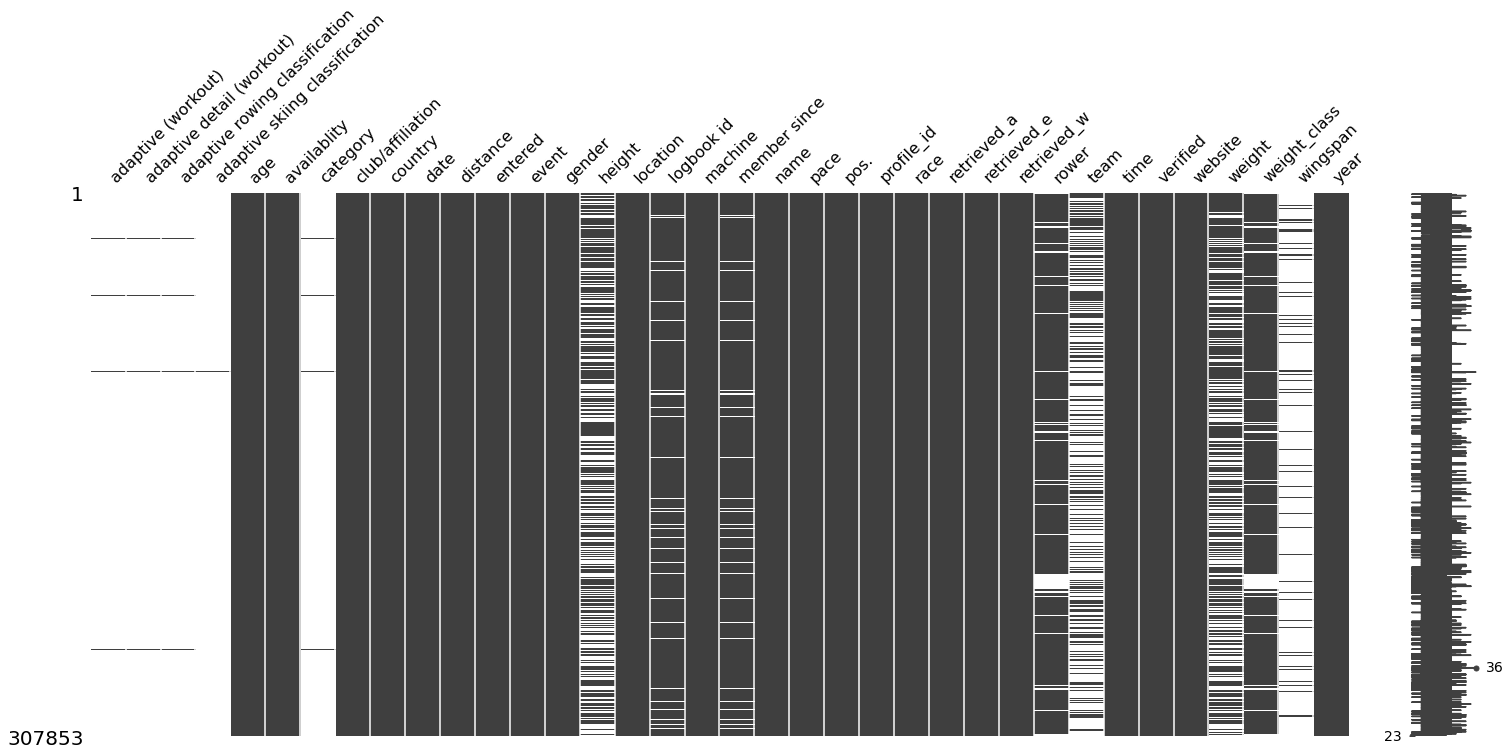

In [368]:
msno.matrix(df_merge)

Doing pretty well. 

Height and weight: that is just not available from the site.

Wingspan: almost all missing. We probably just need to get rid of this column.

Logbook id and member since: seems to indicate workouts not associated with an active athlete profile, not necassarily a problem.

Weight class and rower: only used for rowing machine workouts so this is expected.

Adaptive: very few adaptive workouts, perhaps not enough to use.

## Imputing Height and Weight

Pick out just the relevant data columns

In [369]:
df_impute = df_merge[["age", "distance", "event", "gender", "height", "machine", "pos.", "rower", "time", "weight", "weight_class"]]
df_impute.info()

select_mask = (df_impute["rower"] == "rower") & (df_impute["event"] == 2000)
df_impute_row_2k = df_impute[select_mask]

<class 'pandas.core.frame.DataFrame'>
Index: 307853 entries, 51157298 to 35512793
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   age           307853 non-null  int64   
 1   distance      307853 non-null  int64   
 2   event         307853 non-null  category
 3   gender        307853 non-null  category
 4   height        179048 non-null  float64 
 5   machine       307853 non-null  category
 6   pos.          307853 non-null  int64   
 7   rower         279581 non-null  category
 8   time          307853 non-null  float64 
 9   weight        195694 non-null  float64 
 10  weight_class  279581 non-null  category
dtypes: category(5), float64(3), int64(3)
memory usage: 26.0+ MB


In [370]:
fig = px.histogram(df_impute_row_2k, x="height")
fig.show()

In [371]:
df_impute_row_2k = df_impute_row_2k.sort_values(by="height")
df_impute_row_2k

age  distance event gender  height machine  pos.  rower    time  \
workout_id                                                                    
52136459     50      2000  2000      M    63.5   rower   139  rower   379.1   
33664519     34      2000  2000      M    83.8   rower  5730  rower   475.3   
35535468     29      2000  2000      M    99.1   rower  3221  rower   439.0   
34284398      7      2000  2000      M   109.2   rower  9038  rower   912.9   
43942664      6      2000  2000      M   111.8   rower  2641  rower   816.3   
...         ...       ...   ...    ...     ...     ...   ...    ...     ...   
34010943     57      2000  2000      F     NaN   rower  2299  rower   840.0   
34798390     47      2000  2000      F     NaN   rower  2306  rower   884.9   
37741013     64      2000  2000      F     NaN   rower  2309  rower   900.0   
36904913     71      2000  2000      F     NaN   rower  2319  rower  1215.8   
37300939     45      2000  2000      F     NaN   rower  2321  rower  1825.0   

            weight weight_class  
workout_id                       
52136459      46.7            H  
33664519      94.8            H  
35535468      88.0            H  
34284398      20.0            H  
43942664      18.6            L  
...            ...          ...  
34010943       NaN            H  
34798390       NaN            H  
37741013       NaN            H  
36904913       NaN            H  
37300939       NaN            H  

[44806 rows x 11 columns]

We need to convert the category types into numbers

In [372]:

#https://stackoverflow.com/questions/47312695/python-sklearn-value-error-could-not-convert-string-to-float

str_cols = df_impute_row_2k[["event", "gender", "machine", "rower", "weight_class"]].columns

clfs = {c:LabelEncoder() for c in str_cols}

for col, clf in clfs.items():
    df_impute_row_2k[col] = clfs[col].fit_transform(df_impute_row_2k[col])


# to reverse the transformation
# df_impute['event'] = clfs['event'].inverse_transform(df_impute['event'])

In [373]:
knn_impute = KNNImputer(n_neighbors=3, weights="distance")
knn_arr = knn_impute.fit_transform(df_impute_row_2k)
knn_df = pd.DataFrame(data=knn_arr, columns=df_impute.columns)

In [374]:
knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44806 entries, 0 to 44805
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           44806 non-null  float64
 1   distance      44806 non-null  float64
 2   event         44806 non-null  float64
 3   gender        44806 non-null  float64
 4   height        44806 non-null  float64
 5   machine       44806 non-null  float64
 6   pos.          44806 non-null  float64
 7   rower         44806 non-null  float64
 8   time          44806 non-null  float64
 9   weight        44806 non-null  float64
 10  weight_class  44806 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB


In [382]:
nulls = df_impute_row_2k["height"].isnull().astype("int")

fig_knn = px.scatter(knn_df, x="height", y="time", title="Height vs Rowing Machine 2000m Time",
           color=nulls)

fig_knn.show()

# Data Spread

For a predictor, we need several workouts linked to the same athlete for these to be useful. How does this look for this data set?

We can get the number of workouts for each athlete profile:

In [376]:
df_aw_count = df_merge["profile_id"].value_counts().to_frame()
df_aw_count.rename(columns={"profile_id":"Workouts"}, inplace=True)
df_aw_count.index.set_names("Athlete", inplace=True)
#display(df_aw_count)

and plot a histogram of this to see the distribution.

In [377]:
fig_aw_count = px.histogram(df_aw_count, "Workouts")
fig_aw_count.show()

Now, this doesn't actually tell us want we want. We want to be able to see how many athletes have x or more workouts.

In [378]:
df_aw_count_count = df_aw_count.value_counts().to_frame().reset_index()
#df_aw_count_count.index.set_names("Workouts per Athlete", inplace=True)
df_aw_count_count.rename(columns={0:"Count","Workouts":"Workouts per Athlete"}, inplace=True)
df_aw_count_count["Count (x or greater)"] = np.nan

for i in range(len(df_aw_count_count)):
	df_aw_count_count.loc[i,"Count (x or greater)"] = df_aw_count_count["Count"][i:].sum()

fig_aw_count_count = px.bar(df_aw_count_count, y="Count (x or greater)", x="Workouts per Athlete")
fig_aw_count_count.show()

In [379]:
# plot country: import pycountry
# use %population